### LeNet 구조
얀 르쿤, 제프리 힌튼의 CNN 의 원시 모델<Br>
CNN 기본 구조, 3 개의 컨볼루션, 1개의 덴스 층 + 출력 층으로 구성<Br>

![lenet](https://i.imgur.com/tQGDtMp.jpg)

- 최후의 CNN층 과 Dense 층의 연결(CONV2 와 FC 층의 관계)
    
    5 by 5 , 16EA 의 activation map 에 5 by 5 16EA 의 필터를 적용 하여 값이 도출된다.
    
    여기서 하이퍼 파라미터 개수 = $(5 \times 5) \times 16 + 1_{ \text(bias)}$

### CNN 의 1 by 1 필터

- 파라미터 수를 줄일 때 사용
- 하나의 데이터 에 대한 설명
---
```py
input_shape = Input(shape=(5,5,16))
x = Conv2D(filters=1, kernel_size=(5,5), padding='valid')(input_shape)
```
---
⇒훈련 파라미터 = 401 <br>
⇒ 출력 값 (1,1,1) <br>

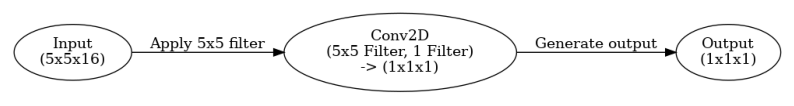

In [19]:
from graphviz import Digraph
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io

# 구조 시각화를 위한 순서도 생성
dot = Digraph(comment='Conv2D with 5x5 Filter', graph_attr={'rankdir': 'LR'})

# 노드 추가
dot.node('A', 'Input\n(5x5x16)')
dot.node('B', 'Conv2D\n(5x5 Filter, 1 Filter)\n-> (1x1x1)')
dot.node('C', 'Output\n(1x1x1)')

# 레이어 간 연결 설정
dot.edge('A', 'B', 'Apply 5x5 filter')
dot.edge('B', 'C', 'Generate output')

# 순서도를 PNG 형식으로 메모리에 저장
img_bytes = dot.pipe(format='png')

# Matplotlib으로 이미지 표시
img = mpimg.imread(io.BytesIO(img_bytes), format='png')
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()


### lenet 실습

In [20]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

In [21]:
# MNIST 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.stack([x_train]*3, axis=-1)
x_test = np.stack([x_test]*3, axis=-1)


In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

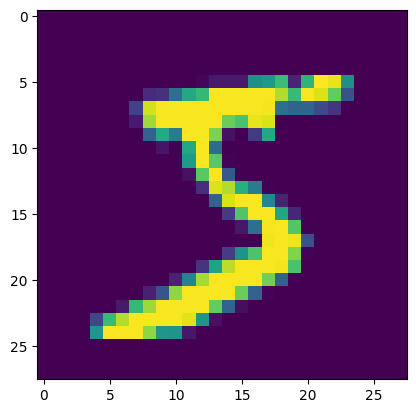

In [23]:
import matplotlib.pyplot as plt
 
plt.imshow(x_train[0]);

In [24]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout

In [25]:
#conv 층
input_layer = Input(shape=(28,28,1))
hidden_layer = Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(input_layer)
hidden_layer = BatchNormalization()(hidden_layer)
hidden_layer = MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden_layer)
hidden_layer = Dropout(0.25)(hidden_layer)

### Fully Connected Layer ###
hidden_layer = Flatten()(hidden_layer)
hidden_layer = Dense(512, activation='relu')(hidden_layer) 
hidden_layer = BatchNormalization()(hidden_layer)
output_layer = Dense(10, activation='softmax')(hidden_layer)

model = Model(input_layer, output_layer)

model.compile(optimizer='adam', 
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,219,402 (12.28 MB)

 Trainable params: 3,218,314 (12.28 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [26]:
from keras.callbacks import EarlyStopping

early_stopping=EarlyStopping(monitor='val_loss',
                 patience=3, 
                 verbose=1, 
                 restore_best_weights=True
                 )
history = model.fit(x_train, y_train, epochs=10000, verbose=1,
                 validation_split=0.2,
                 callbacks=[early_stopping]
                 )

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9234 - loss: 0.2608 - val_accuracy: 0.9718 - val_loss: 0.0942
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9784 - loss: 0.0682 - val_accuracy: 0.9812 - val_loss: 0.0589
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9848 - loss: 0.0454 - val_accuracy: 0.9848 - val_loss: 0.0549
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9894 - loss: 0.0319 - val_accuracy: 0.9858 - val_loss: 0.0493
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9912 - loss: 0.0277 - val_accuracy: 0.9874 - val_loss: 0.0495
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9937 - loss: 0.0208 - val_accuracy: 0.9864 - val_loss: 0.0491
Epoch 7/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9945 - loss: 0.0163 - val_accuracy: 0.9874 - val_loss: 0.0486
Epoch 8/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 

In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_new_image(img_path):
    # 사이즈 조정 (모델 훈련 인풋에 맞춤)
    img = image.load_img(img_path, target_size=(28, 28))  # Color image, adjust target size
    # numpy 배열로 변환.
    img_tensor = image.img_to_array(img)[:,:,0]
    # 정규화(0-1)
    img_tensor = img_tensor.astype('float32') / 255.0
    # Add a batch dimension
    img_tensor = np.expand_dims(img_tensor, axis=0)

    # 모델을 이용, 입력이미지의 숫자 예측
    prediction = model.predict(img_tensor)
    # 예측된(가장 높은 확률을 가진 클래스) 숫자반환
    # digit = np.argmax(prediction)
    digit = prediction
    formatted_prediction = np.round(prediction, decimals=3)

    return formatted_prediction, np.argmax(digit)

In [28]:
img_path ='../../data/img_8.png'

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

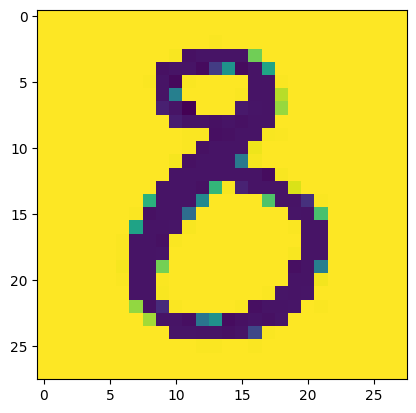

In [29]:
# 사이즈 조정 (모델 훈련 인풋에 맞춤)
img = image.load_img(img_path, target_size=(28, 28))  # Color image, adjust target size
# numpy 배열로 변환.
img_tensor = image.img_to_array(img)[:,:,1]
# 정규화(0-1)
img_tensor = img_tensor.astype('float32') / 255.0
# Add a batch dimension
img_tensor = np.expand_dims(img_tensor, axis=0)
plt.imshow(img_tensor[0]);

In [30]:

# 모델을 이용, 입력이미지의 숫자 예측
prediction = model.predict(img_tensor)
# 예측된(가장 높은 확률을 가진 클래스) 숫자반환
digit = np.argmax(prediction)
formatted_prediction = np.round(prediction, decimals=3)
digit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


np.int64(4)